In [8]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot



In [9]:
import sys
import os


sys.path.append(r'C:\Users\pc\Desktop\cs229_ps1\src')


from linear_model import LinearModel
import util


x_train, y_train = util.load_dataset(r'C:\Users\pc\Desktop\cs229_ps1\data\ds1_train.csv', add_intercept=True)
x_valid, y_valid = util.load_dataset(r'C:\Users\pc\Desktop\cs229_ps1\data\ds1_valid.csv', add_intercept=True)


In [10]:
class logestic_newton(LinearModel):
    def fit(self,x,y):
        def h(theta,x):
            return 1/(1 + np.exp(-np.dot(x, theta)))
        def gradient(theta,x,y):
            m,_=x.shape
            return (-1/m)*np.dot(x.T,y - h(theta,x))
        def Hessian(theta,x):
            m,_=x.shape
            h_theta_x = h(theta, x)
            S = np.diag((h_theta_x * (1 - h_theta_x)))
            return (1/m) * np.dot(x.T, np.dot(S, x))
        def update_theta(theta,x,y):
            return theta - np.dot(np.linalg.inv(Hessian(theta,x)), gradient(theta,x,y))
        m,n=x.shape
        self.err=0.001
        self.theta=np.zeros(n)
        old_theta=self.theta
        new_theta=update_theta(old_theta,x,y)
        while np.linalg.norm(old_theta-new_theta,1) >= self.err:
            self.theta=new_theta
            old_theta=self.theta
            new_theta=update_theta(old_theta,x,y)
        self.theta=new_theta

    def predict(self,x):
        pred = 1/(1 + np.exp(-np.dot(x, self.theta)))
        return (pred >= 0.5).astype(int)


The accuracy on training set is: 0.8825


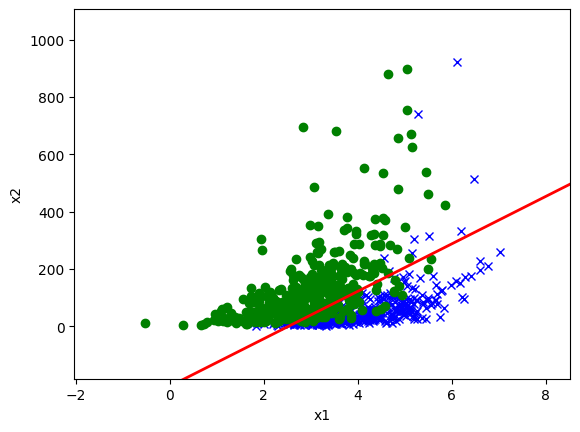

In [11]:
model = logestic_newton()
model.fit(x_train, y_train)
util.plot(x_train,y_train,theta=model.theta)
print("The accuracy on training set is:", np.mean(model.predict(x_train) == y_train))


The accuracy on validation set is:  0.9


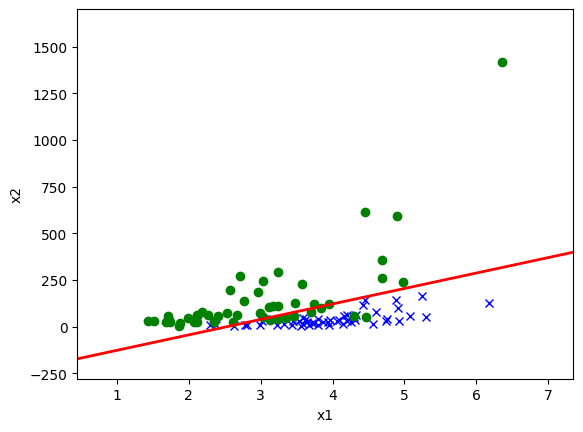

In [12]:
util.plot(x_valid, y_valid, model.theta)
print("The accuracy on validation set is: ", np.mean(model.predict(x_valid) == y_valid))

In [13]:
x_train, y_train = util.load_dataset('data/ds3_train.csv', add_intercept=True)
_, t_train = util.load_dataset('data/ds3_train.csv', label_col='t')
x_valid, y_valid = util.load_dataset('data/ds3_valid.csv', add_intercept=True)
_, t_valid = util.load_dataset('data/ds3_valid.csv', label_col='t')
x_test, y_test = util.load_dataset('data/ds3_test.csv', add_intercept=True)
_, t_test = util.load_dataset('data/ds3_test.csv', label_col='t')


0.9632


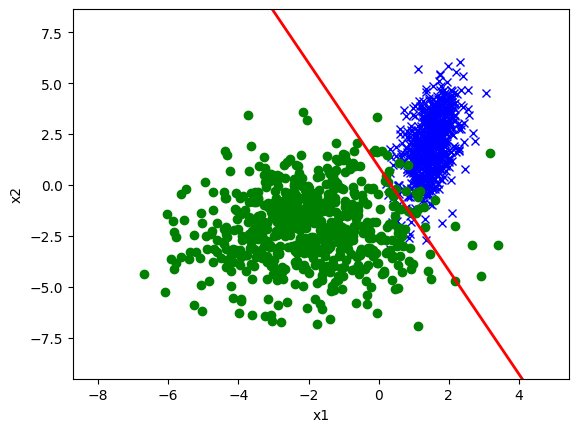

In [20]:
model=logestic_newton(LinearModel)
model.fit(x_train,t_train)

util.plot(x_train, t_train, model.theta)
# print("Theta is: ", model.theta)
print( np.mean(t_train == model.predict(x_train)))

Theta is:  [-0.9711418   2.73208784  1.07403478]
The accuracy on test set is:  0.9838709677419355


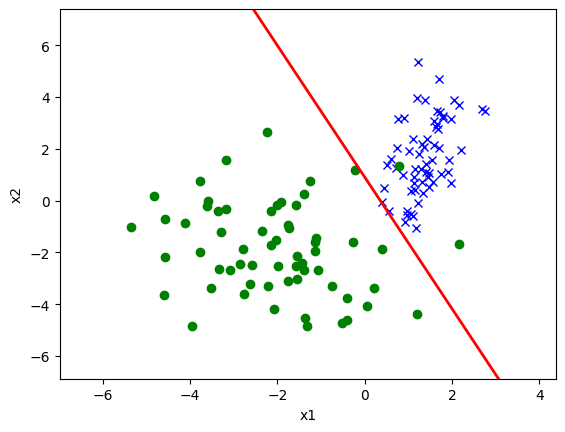

In [23]:
util.plot(x_test, t_test, model.theta)
print("Theta is: ", model.theta)
print("The accuracy on test set is: ", np.mean(t_test == model.predict(x_test)))


0.9838709677419355
Theta_prime is:  [-0.81507205  2.73208784  1.07403478]
The accuracy on test set is:  0.9838709677419355


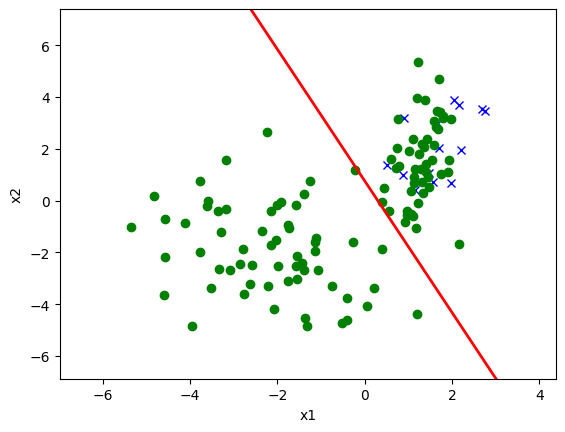

In [31]:
def h(theta,x):
    return 1/(1+np.exp(-1*np.dot(x,theta)))
valid=x_valid[y_valid==1]
alpha=h(model.theta,valid).mean()
def prediction(theta,x):
    return h(theta,x)/alpha >=0.5
print(np.mean(t_test==prediction(model.theta,x_test)))
theta_prime = model.theta + np.log(2 / alpha - 1) * np.array([1, 0, 0])
util.plot(x_test, y_test, theta_prime)
print("Theta_prime is: ", theta_prime)
print("The accuracy on test set is: ", np.mean(prediction(model.theta, x_test) == t_test))
